# Import Library & Setup Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dicoding/5. Machine Learning Terapan'

!mkdir -p ~/.kaggle
!cp '{path}/kaggle.json' ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d rodolfofigueroa/spotify-12m-songs

!unzip -o '/content/spotify-12m-songs.zip' -d '/content'

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs
License(s): unknown
Archive:  /content/spotify-12m-songs.zip
  inflating: /content/tracks_features.csv  


1. Menghubungkan Google Drive agar dapat mengambil file `kaggle.json`.
2. Menyalin `kaggle.json` ke folder `.kaggle` dan mengatur izinnya.
3. Mengunduh dataset Spotify dari Kaggle.
4. Mengekstrak file zip dataset ke direktori `/content`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

- `pandas`, `numpy`: untuk manipulasi dan analisis data.
- `matplotlib`, `seaborn`: untuk visualisasi grafik dan distribusi data.
- `LabelEncoder`, `MinMaxScaler`: untuk encoding dan normalisasi fitur numerik.
- `cosine_similarity`: untuk menghitung kemiripan antar lagu.
- `PCA`: untuk reduksi dimensi dan visualisasi clustering lagu.

## Load Dataset

In [3]:
df = pd.read_csv("/content/tracks_features.csv")
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


Membaca dataset Spotify dari file `tracks_features.csv` dan menampilkan 5 baris pertama untuk melihat struktur awal data.


# Data Understanding

## Data Assessing

In [4]:
df.shape

(1204025, 24)

Menampilkan ukuran dataset, yaitu terdiri dari 1.204.025 baris dan 24 kolom yang berisi informasi fitur dari lagu-lagu di Spotify


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

Menampilkan informasi struktur dataset, termasuk nama kolom, jumlah nilai tidak null di setiap kolom, serta tipe data masing-masing kolom. Informasi ini berguna untuk mengetahui apakah terdapat missing value dan tipe data yang perlu diproses lebih lanjut.

In [6]:
df.isnull().sum()

,0
id,0
name,3
album,11
album_id,0
artists,0
artist_ids,0
track_number,0
disc_number,0
explicit,0
danceability,0


Menghitung jumlah nilai kosong (missing value) pada setiap kolom. Ditemukan bahwa hanya kolom `name` dan `album` yang memiliki missing value, masing-masing sebanyak 3 dan 11 entri. Kolom lainnya lengkap.

In [7]:
df = df.dropna()

Menghapus seluruh baris yang memiliki nilai kosong.

In [8]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06
mean,7.656363e+00,1.055906e+00,4.930547e-01,5.095332e-01,5.194165e+00,-1.180876e+01,6.714609e-01,8.438146e-02,4.467552e-01,2.828595e-01,2.015992e-01,4.279832e-01,1.176341e+02,2.488403e+05,3.832493e+00,2.007328e+03
std,5.994988e+00,2.953767e-01,1.896693e-01,2.946836e-01,3.536723e+00,6.982141e+00,4.696822e-01,1.159915e-01,3.852013e-01,3.762849e-01,1.804584e-01,2.704829e-01,3.093701e+01,1.622111e+05,5.611853e-01,1.210118e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740890e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243400e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


Menampilkan statistik deskriptif dari fitur numerik dalam dataset, seperti nilai minimum, maksimum, mean, median, dan standar deviasi.

## EDA (Exploratory Data Analysis )

### Distribusi Audio Features

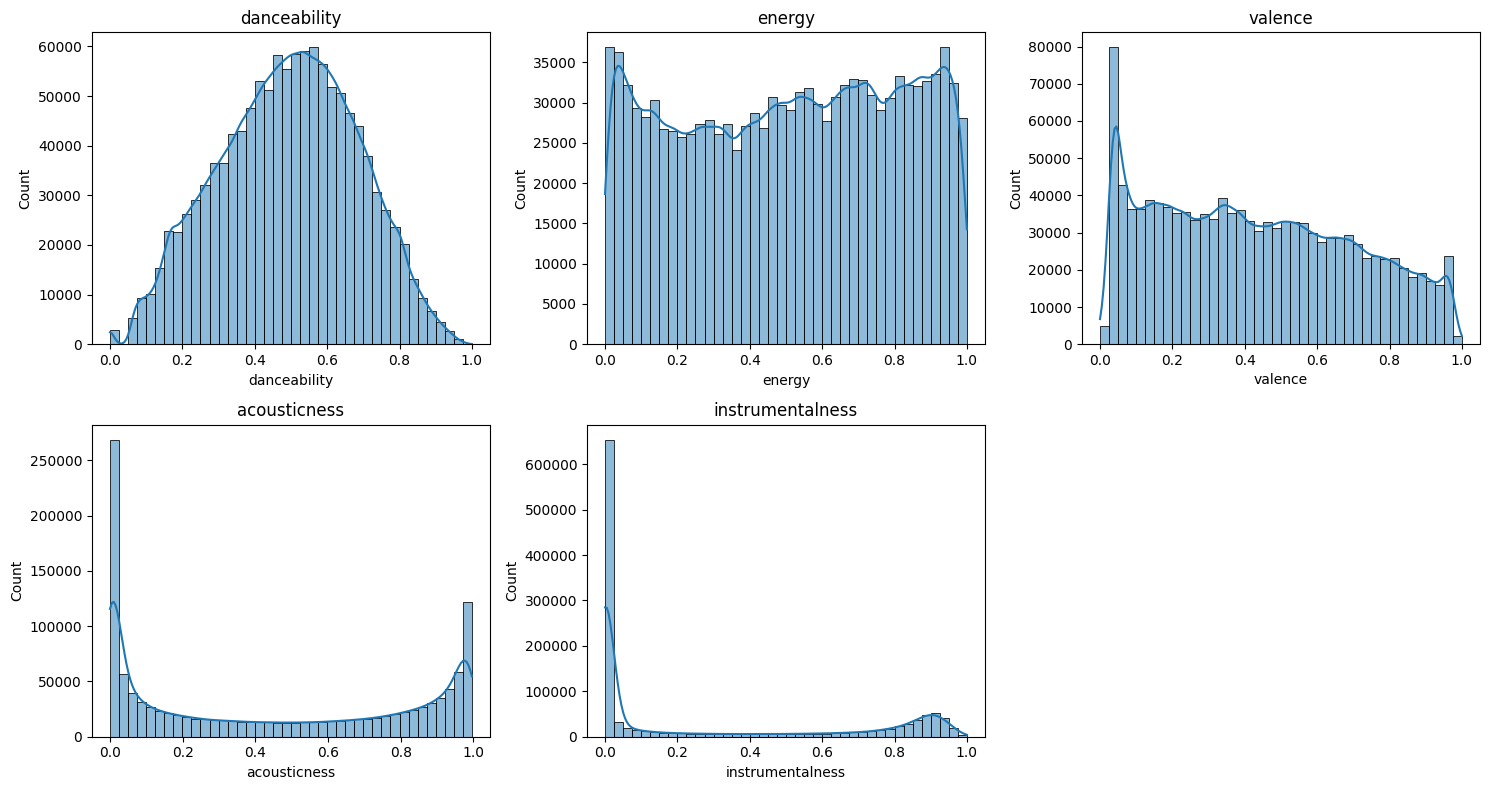

In [9]:
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

plt.figure(figsize=(15, 8))
for i, col in enumerate(audio_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()

Visualisasi distribusi lima fitur audio utama (`danceability`, `energy`, `valence`, `acousticness`, dan `instrumentalness`) menggunakan histogram.

- `danceability` menunjukkan distribusi mendekati normal dengan puncak di sekitar 0.5–0.6.
- `energy` memiliki distribusi yang cukup merata dengan sedikit puncak di nilai rendah dan tinggi.
- `valence` (tingkat kebahagiaan lagu) cenderung menurun seiring peningkatan nilainya.
- `acousticness` menunjukkan dua konsentrasi ekstrem: sangat rendah dan sangat tinggi.
- `instrumentalness` sangat terpusat pada nilai rendah, dengan sedikit distribusi di nilai tinggi, menandakan mayoritas lagu memiliki sedikit elemen instrumental.

### Korelasi antar Audio Features

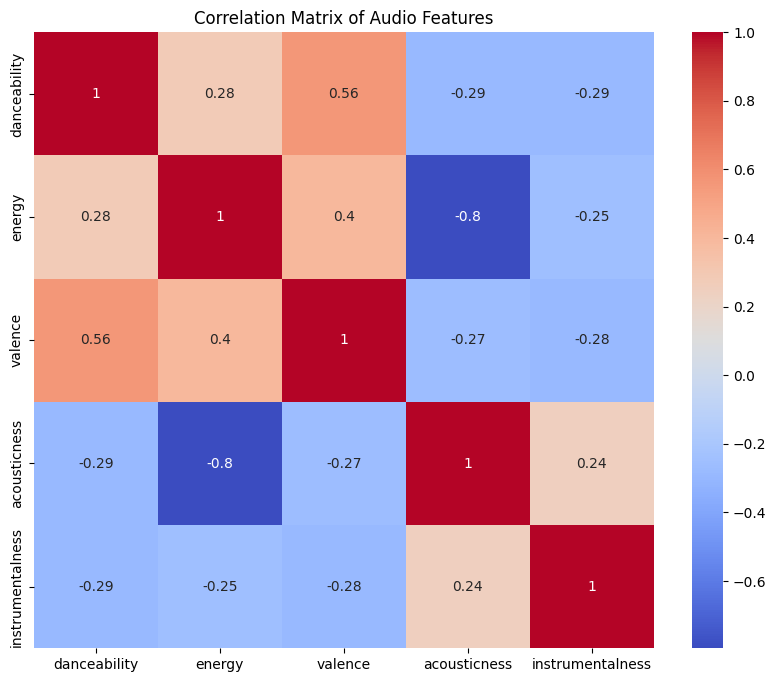

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[audio_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Audio Features")
plt.show()

Matriks korelasi antar fitur audio menunjukkan hubungan linear antara fitur-fitur numerik lagu.

- `danceability`, `energy`, dan `valence` saling berkorelasi positif, artinya lagu yang enerjik cenderung memiliki kesan ceria dan mudah untuk menari.
- `acousticness` memiliki korelasi negatif yang kuat dengan `energy` (-0.80), menandakan bahwa lagu akustik biasanya memiliki energi rendah.
- `instrumentalness` memiliki korelasi lemah dengan fitur lainnya, menunjukkan bahwa kehadiran instrumen tidak terlalu dipengaruhi oleh aspek danceability atau valence.

### Distribusi Tahun dan Durasi Lagu

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['duration_min'] = df['duration_ms'] / 60000

valid_df = df[df['year'].notna() & df['duration_min'].notna()]

- Mengonversi kolom `release_date` ke format datetime, lalu mengekstrak tahunnya ke kolom baru `year`, karena kolom `year` sebelumnya terdapat terdapat nilai invalid.
- Menghitung durasi lagu dalam satuan menit dari kolom `duration_ms`.
- Data yang memiliki nilai kosong pada `year` atau `duration_min` disaring dan disimpan dalam `valid_df` untuk memastikan hanya data valid yang digunakan dalam pemodelan.

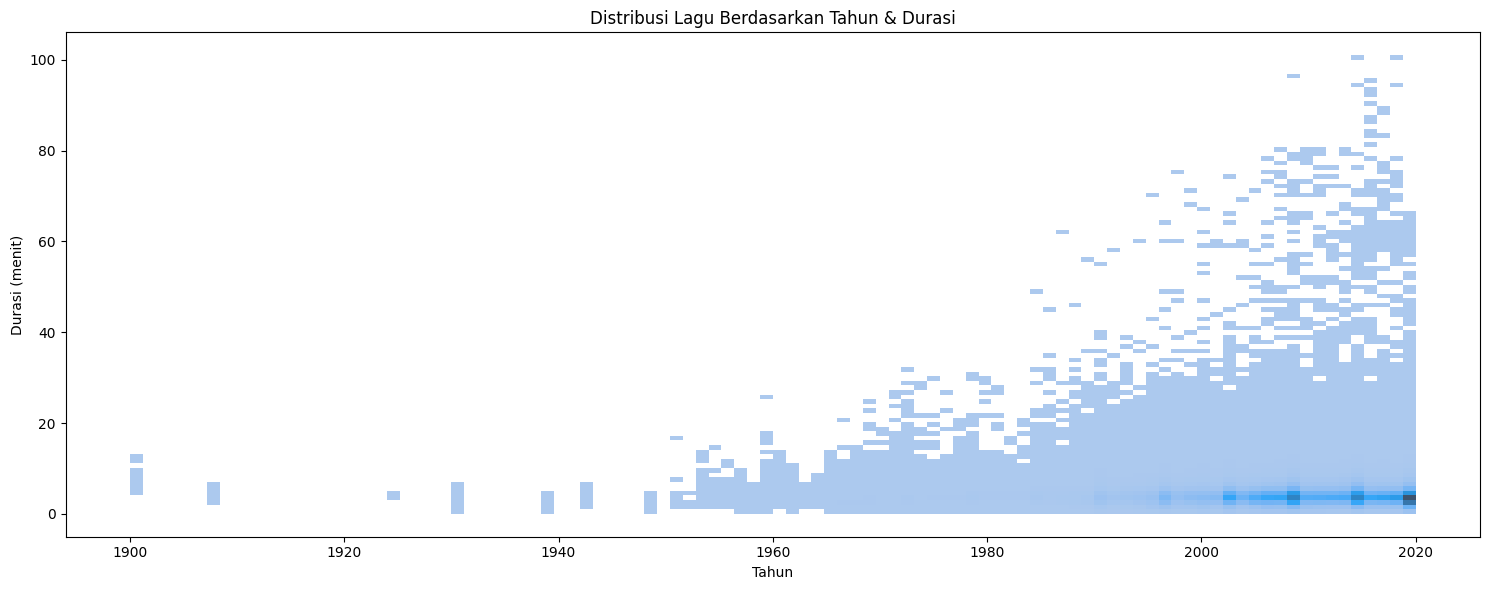

In [12]:
plt.figure(figsize=(15, 6))
sns.histplot(
    data=valid_df,
    x='year',
    y='duration_min',
    bins=100,
)
plt.title('Distribusi Lagu Berdasarkan Tahun & Durasi')
plt.xlabel('Tahun')
plt.ylabel('Durasi (menit)')
plt.tight_layout()
plt.show()

Visualisasi distribusi lagu berdasarkan tahun rilis dan durasi lagu dalam satuan menit. Mayoritas lagu dengan durasi wajar (sekitar 2–5 menit) lebih banyak diproduksi setelah tahun 2000.

### Distribusi Kolom Explicit

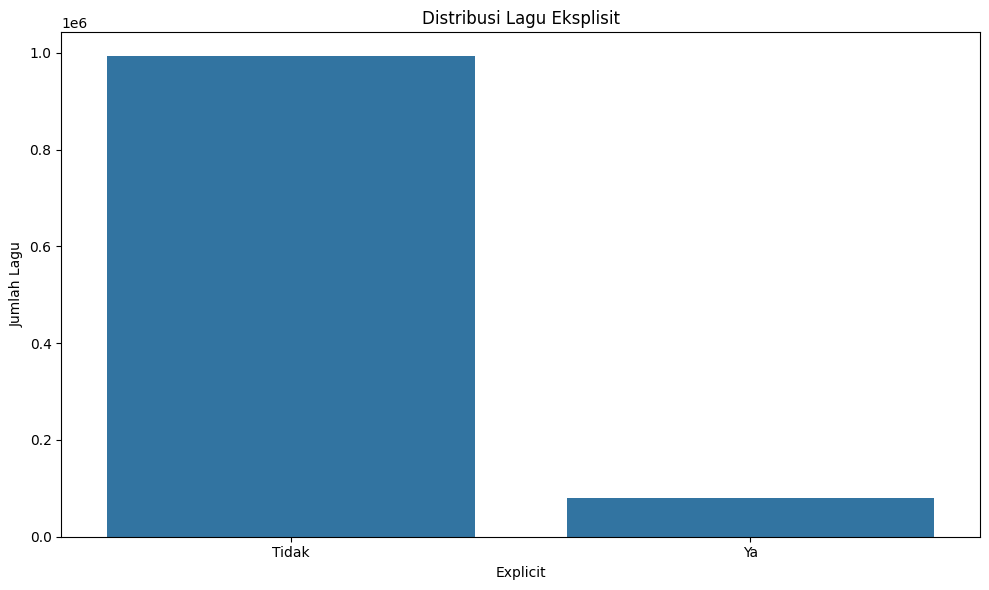

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=valid_df, x='explicit')
plt.title('Distribusi Lagu Eksplisit')
plt.xlabel('Explicit')
plt.ylabel('Jumlah Lagu')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

Visualisasi distribusi lagu berdasarkan status eksplisit. Sebagian besar lagu dalam dataset tidak mengandung konten eksplisit, dengan hanya sebagian kecil yang ditandai sebagai eksplisit.

> *Note* : "**explicit**" merujuk pada lagu yang mengandung konten dewasa atau sensitif.

# Data Preparation

### Encoding Kolom track_id

In [14]:
track_encoder = LabelEncoder()
valid_df['track_encoded'] = track_encoder.fit_transform(valid_df['id'])

<ipython-input-14-89f8ee1c75a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['track_encoded'] = track_encoder.fit_transform(valid_df['id'])


Melakukan encoding pada kolom `id` lagu menjadi nilai numerik dengan `LabelEncoder`, lalu disimpan ke kolom baru `track_encoded`. Bertujuan untuk mengubah ID lagu yang berupa string menjadi angka agar bisa digunakan dalam perhitungan similarity dan visualisasi.

### Feature Selection

In [15]:
valid_df = valid_df.sample(n=10000, random_state=42).reset_index(drop=True)

content_features = valid_df[[
    'danceability', 'energy', 'valence',
    'acousticness', 'instrumentalness', 'tempo',
    'duration_min', 'year'
]]

Mengambil sampel acak sebanyak 10.000 lagu dari dataset untuk mengurangi beban komputasi saat perhitungan similarity, karena sebelumnya terjadi crash runtime pada google collab. Kemudian, memilih fitur-fitur konten utama dari lagu (seperti karakteristik audio dan metadata numerik) yang akan digunakan dalam model Content-Based Filtering.

### Normalisasi Fitur

In [16]:
scaler = MinMaxScaler()
content_features_scaled = scaler.fit_transform(content_features)

Melakukan normalisasi terhadap fitur konten menggunakan `MinMaxScaler` agar seluruh nilai berada dalam rentang 0 hingga 1. Agar semua fitur memiliki kontribusi yang seimbang dalam perhitungan kemiripan antar lagu.

# Modeling : Content-Based Filtering

## Hitung Similarity Antar Lagu

In [17]:
content_similarity = cosine_similarity(content_features_scaled)

similarity_df = pd.DataFrame(
    content_similarity,
    index=valid_df['track_encoded'],
    columns=valid_df['track_encoded']
)

Menghitung kemiripan antar lagu berdasarkan fitur kontennya menggunakan cosine similarity, lalu menyimpannya dalam bentuk DataFrame. Nilai similarity ini digunakan untuk merekomendasikan lagu-lagu yang memiliki karakteristik serupa.

## Rekomendasi Lagu Serupa

In [18]:
def recommend_similar_tracks(track_id, top_n=10):
    if track_id not in similarity_df.index:
        return pd.DataFrame()

    sim_scores = similarity_df.loc[track_id]

    sim_scores = sim_scores.sort_values(ascending=False).iloc[1:top_n+1]

    similar_ids = sim_scores.index.tolist()

    similar_tracks = valid_df[valid_df['track_encoded'].isin(similar_ids)][['track_encoded', 'name', 'artists']].copy()

    similar_tracks['similarity_score'] = similar_tracks['track_encoded'].map(sim_scores)

    similar_tracks = similar_tracks.sort_values(by='similarity_score', ascending=False).reset_index(drop=True)

    return similar_tracks


Membuat fungsi `recommend_similar_tracks()` untuk merekomendasikan lagu-lagu yang mirip dengan lagu input berdasarkan nilai cosine similarity.

- Menerima `track_id` sebagai input dan jumlah hasil `top_n` yang diinginkan.
- Mengambil nilai similarity terhadap lagu lain, mengurutkannya, dan memilih lagu paling mirip (kecuali dirinya sendiri).
- Mengembalikan DataFrame berisi informasi lagu-lagu yang direkomendasikan beserta skor kemiripannya.


In [19]:
random_track = valid_df.sample(n=1).iloc[0]
example_track = random_track['track_encoded']

print("Lagu referensi:")
valid_df[valid_df['track_encoded'] == example_track][['name', 'artists']]

Lagu referensi:


,name,artists
9320,Aleko (Sung in Russian): Cradle Scene: Old man...,"['Sergei Rachmaninoff', 'Sergey Murzaev', 'Evg..."


Memilih satu lagu secara acak dari dataset sebagai lagu referensi untuk rekomendasi. Lagu yang dipilih akan digunakan sebagai input untuk mencari lagu-lagu dengan karakteristik konten yang paling mirip.

In [20]:
recommendations = recommend_similar_tracks(example_track, top_n=20)
print("Rekomendasi lagu serupa:")
recommendations

Rekomendasi lagu serupa:


,track_encoded,name,artists,similarity_score
0,595513,"Flowers from the Flora of Danish Poetry, Op. 3...","['Ib Nørholm', 'Per Palsson', 'Else Torp']",0.999102
1,721665,"Siegfried, WWV 86C Act II Scene 2: Wir sind zu...","['Stephen Gould', 'Gerhard Siegel', 'Albert Do...",0.998970
2,343696,"2 Songs, Op. 8: No. 2. Du machst mich allein","['Anton Webern', 'Tony Arnold', 'Twentieth Cen...",0.998763
3,508853,If I Loved You,"['Janis Mann', 'Kenny Werner']",0.998657
4,1007627,Lascia Ch'io Pianga,"['Alice Zawadzki', 'Dan Whieldon']",0.998580
5,828217,"Jugendlieder (Excerpts): No. 6, Überwunden","['Franz Schreker', 'Wolfgang Holzmair', 'Russe...",0.998369
6,745436,Songs from Spoon River: VII. Margaret Fuller S...,"['Lita Grier', 'Elizabeth Norman', 'Michelle A...",0.998206
7,1032326,"Thesee: Act II Scene 1: Doux repos, innocente ...","['Jean-Baptiste Lully', 'Howard Crook', 'Laura...",0.998068
8,424742,Die Walkure: Act I Scene 2: Friedmund darf ich...,"['Richard Wagner', 'Endrik Wottrich', 'Kwangch...",0.997948
9,861508,Uzh Kak Pal Tuman (As The Mist Rose) - Arr. S....,"['Talisman', 'Kolpakov Trio', 'Alexander Guril...",0.997915


Mengambil 20 lagu yang paling mirip dengan lagu referensi berdasarkan hasil perhitungan cosine similarity, lalu menampilkannya sebagai rekomendasi. Setiap lagu yang direkomendasikan disertai dengan skor kemiripannya.

# Evaluation

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(content_features_scaled)

valid_df['pca_1'] = pca_result[:, 0]
valid_df['pca_2'] = pca_result[:, 1]

Menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi fitur konten lagu menjadi dua komponen utama. Hasil transformasi disimpan dalam kolom `pca_1` dan `pca_2`, yang akan digunakan untuk visualisasi distribusi dan klasterisasi lagu dalam 2 dimensi.

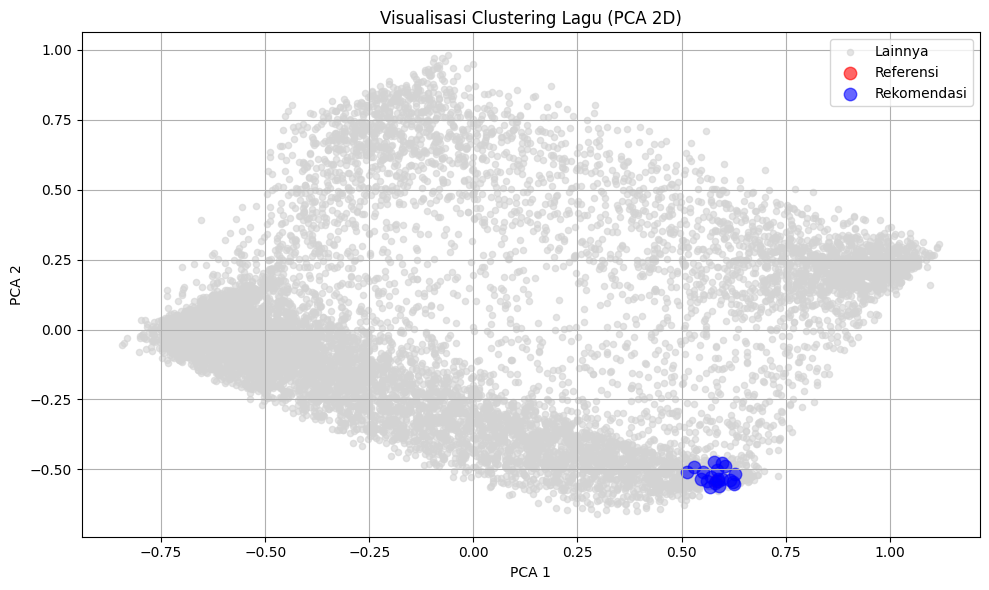

In [22]:
recommendations = recommend_similar_tracks(example_track, top_n=20)
selected_ids = recommendations['track_encoded'].tolist() + [example_track]

valid_df['type'] = 'Lainnya'
valid_df.loc[valid_df['track_encoded'] == example_track, 'type'] = 'Referensi'
valid_df.loc[valid_df['track_encoded'].isin(recommendations['track_encoded']), 'type'] = 'Rekomendasi'

plt.figure(figsize=(10, 6))
colors = {'Lainnya': 'lightgray', 'Referensi': 'red', 'Rekomendasi': 'blue'}

for label, group in valid_df.groupby('type'):
    plt.scatter(group['pca_1'], group['pca_2'],
                label=label, alpha=0.6, s=20 if label == 'Lainnya' else 80,
                color=colors[label])

plt.legend()
plt.title("Visualisasi Clustering Lagu (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi hasil PCA untuk menunjukkan posisi lagu referensi dan lagu-lagu yang direkomendasikan dalam ruang 2 dimensi berdasarkan fitur kontennya.

- Lagu referensi ditampilkan dengan warna merah.
- Lagu-lagu hasil rekomendasi ditampilkan dengan warna biru.
- Lagu lainnya ditampilkan dengan warna abu-abu.

Distribusi ini menunjukkan bahwa lagu-lagu yang direkomendasikan berada dalam cluster yang sama atau dekat dengan lagu referensi, yang menjadi indikasi bahwa sistem rekomendasi berhasil mengidentifikasi kemiripan konten.